In [1]:
from movielens import *
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import sys
import time
import pickle
user = []
item = []
rating = []
rating_test = []

# Load the movie lens dataset into arrays
d = Dataset()
d.load_users("data/u.user", user)
d.load_items("data/u.item", item)
d.load_ratings("data/u.base", rating)
d.load_ratings("data/u.test", rating_test)

n_users = len(user)
n_items = len(item)
utility = np.zeros((n_users, n_items))
for r in rating:
    utility[r.user_id-1][r.item_id-1] = r.rating

# Finds the average rating for each user and stores it in the user's object
for i in range(n_users):
    rated = np.nonzero(utility[i]) #np.nonzero returns indices of the elements that are non-zero.
    n = len(rated[0])
    if n != 0:
        user[i].avg_r = np.mean(utility[i][rated])
    else:
        user[i].avg_r = 0.

print (utility)
test = np.zeros((n_users, n_items))
for r in rating_test:
    test[r.user_id - 1][r.item_id - 1] = r.rating
movie_genre = []
for movie in item:
    movie_genre.append([movie.unknown, movie.action, movie.adventure, movie.animation, movie.childrens, movie.comedy,
                        movie.crime, movie.documentary, movie.drama, movie.fantasy, movie.film_noir, movie.horror,
                        movie.musical, movie.mystery, movie.romance, movie.sci_fi, movie.thriller, movie.war, movie.western])

movie_genre = np.array(movie_genre)

[[ 5.  3.  4. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 5.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  5.  0. ...,  0.  0.  0.]]


In [6]:
print (len(item))

1682


In [8]:
print (movie_genre.size)

31958


In [17]:
nutility = np.array(utility)
cluster1 = KMeans(n_clusters=30)
cluster1.fit_predict(nutility)

array([ 1, 26,  0, 20,  4, 14,  8, 24, 20, 19, 13, 25, 15, 11, 26, 11, 20,
       16, 20, 20,  0, 24, 13, 25, 25, 26, 20, 25, 20, 20, 20, 26, 20, 20,
       20, 20, 24,  4, 20, 20, 25,  9,  9, 13, 26, 20, 20, 25,  1, 20, 20,
       26, 26, 26, 20, 13, 18, 11, 16, 14, 20,  1, 26, 13, 25, 26, 20, 26,
       26, 13, 20,  1, 25,  0, 18, 25, 25, 20, 26, 20, 26, 11, 18, 18, 19,
       20, 24, 20, 26,  5, 25,  7, 20,  7, 13, 25, 25, 20, 18,  0, 18, 24,
       20, 10, 20, 25, 20, 26, 12, 24, 20,  0, 26, 25, 25,  0, 18, 25, 18,
       26, 26, 25, 25, 20,  4,  0, 20,  9, 20, 12, 20, 20, 20, 20, 20, 26,
       26, 25, 20, 20, 18, 20, 20, 23, 10, 20, 20, 25,  0, 26, 16, 18, 20,
       25, 20, 20, 26, 24, 18,  1, 20, 26, 20, 18, 20, 20, 20, 18, 20, 20,
       20, 20,  0, 18, 25, 26,  1,  7,  0, 25, 18, 26, 20, 19, 26, 18, 25,
       25, 14, 26, 20, 26, 18,  8, 26, 20, 24,  1, 26,  3,  7, 20, 26, 20,
       20,  0,  1, 20, 26, 13, 20, 20,  1,  1, 13,  1, 24, 25, 20, 20, 24,
       12, 18, 25, 20, 25

In [18]:
movie_genre = np.array(movie_genre)
cluster = KMeans(n_clusters=19)
cluster.fit_predict(movie_genre)

array([18, 10,  7, ..., 14,  6,  4], dtype=int32)

In [19]:
utility_clustered = []

In [21]:
print (cluster.labels_[0])

18


In [22]:
utility_clustered = []
for i in range(0, n_users):
    average = np.zeros(19)
    tmp = []
    for m in range(0, 19):
        tmp.append([])
    for j in range(0, n_items):
        if utility[i][j] != 0:
            tmp[cluster.labels_[j] - 1].append(utility[i][j])
    for m in range(0, 19):
        if len(tmp[m]) != 0:
            average[m] = np.mean(tmp[m])
        else:
            average[m] = 0
    utility_clustered.append(average)

utility_clustered = np.array(utility_clustered)

In [25]:
print (utility_clustered[1])

[ 3.75        4.          3.          3.53333333  0.          3.6
  3.66666667  0.          4.          3.          0.          3.66666667
  5.          4.125       3.          4.          0.          4.          5.        ]


In [26]:
for i in range(0, n_users):
    x = utility_clustered[i]
    user[i].avg_r = sum(a for a in x if a > 0) / sum(a > 0 for a in x)

In [27]:
def pcs(x, y):
    num = 0
    den1 = 0
    den2 = 0
    A = utility_clustered[x - 1]
    B = utility_clustered[y - 1]
    num = sum((a - user[x - 1].avg_r) * (b - user[y - 1].avg_r) for a, b in zip(A, B) if a > 0 and b > 0)
    den1 = sum((a - user[x - 1].avg_r) ** 2 for a in A if a > 0)
    den2 = sum((b - user[y - 1].avg_r) ** 2 for b in B if b > 0)
    den = (den1 ** 0.5) * (den2 ** 0.5)
    if den == 0:
        return 0
    else:
        return num / den

pcs_matrix = np.zeros((n_users, n_users))
for i in range(0, n_users):
    for j in range(0, n_users):
        if i!=j:
            pcs_matrix[i][j] = pcs(i + 1, j + 1)
            sys.stdout.write("\rGenerating Similarity Matrix [%d:%d] = %f" % (i+1, j+1, pcs_matrix[i][j]))
            sys.stdout.flush()
            time.sleep(0.00005)
print ("\rGenerating Similarity Matrix [%d:%d] = %f" % (i+1, j+1, pcs_matrix[i][j]))

Generating Similarity Matrix [943:654] = 0.4023769

In [28]:

utility_copy = np.copy(utility_clustered)

In [29]:
def norm():
    normalize = np.zeros((n_users, 19))
    for i in range(0, n_users):
        for j in range(0, 19):
            if utility_clustered[i][j] != 0:
                normalize[i][j] = utility_clustered[i][j] - user[i].avg_r
            else:
                normalize[i][j] = float('Inf')
    return normalize

def guess(user_id, i_id, top_n):
    similarity = []
    for i in range(0, n_users):
        if i+1 != user_id:
            similarity.append(pcs_matrix[user_id-1][i]) #append the row of user from similarity matrix
    temp = norm()
    temp = np.delete(temp, user_id-1, 0)
    top = [x for (y,x) in sorted(zip(similarity,temp), key=lambda pair: pair[0], reverse=True)]
    s = 0
    c = 0
    for i in range(0, top_n):
        if top[i][i_id-1] != float('Inf'):
            s += top[i][i_id-1]
            c += 1
    g = user[user_id-1].avg_r if c == 0 else s/float(c) + user[user_id-1].avg_r
    if g < 1.0:
        return 1.0
    elif g > 5.0:
        return 5.0
    else:
        return g

utility_copy = np.copy(utility_clustered)
for i in range(0, n_users):
    for j in range(0, 19):
        if utility_copy[i][j] == 0:
            sys.stdout.write("\rGuessing [User:Rating] = [%d:%d]" % (i, j))
            sys.stdout.flush()
            time.sleep(0.00005)
            utility_copy[i][j] = guess(i+1, j+1, 150)
print ("\rGuessing [User:Rating] = [%d:%d]" % (i, j))

Guessing [User:Rating] = [942:18]


In [30]:
y_true = []
y_pred = []
f = open('test.txt', 'w')
for i in range(0, n_users):
    for j in range(0, n_items):
        if test[i][j] > 0:
            f.write("%d, %d, %.4f\n" % (i+1, j+1, utility_copy[i][cluster.labels_[j]-1]))
            y_true.append(test[i][j])
            y_pred.append(utility_copy[i][cluster.labels_[j]-1])
f.close()

In [31]:

print ("Mean Squared Error: %f" % mean_squared_error(y_true, y_pred))

Mean Squared Error: 1.282157


In [32]:
print (pcs_matrix)

[[ 0.         -0.09512883  0.27294295 ..., -0.36509478 -0.17695801
   0.35714682]
 [-0.09512883  0.          0.05645865 ...,  0.17890818  0.13510515
  -0.13542599]
 [ 0.27294295  0.05645865  0.         ...,  0.00107734  0.06022812
  -0.03483249]
 ..., 
 [-0.36509478  0.17890818  0.00107734 ...,  0.         -0.31604722
  -0.40711795]
 [-0.17695801  0.13510515  0.06022812 ..., -0.31604722  0.          0.0019365 ]
 [ 0.35714682 -0.13542599 -0.03483249 ..., -0.40711795  0.0019365   0.        ]]


In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
plt.pcolormesh(pcs_matrix)

In [35]:
plt.colorbar()

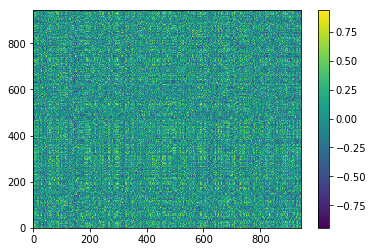

In [36]:
plt.show()

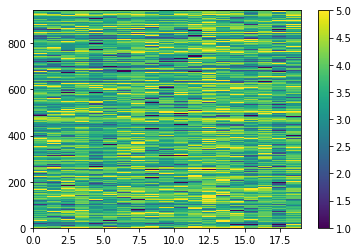

In [37]:
plt.pcolormesh(utility_copy)
plt.colorbar() #need a colorbar to show the intensity scale
plt.show() #boom
